In [17]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

import torch

from yolov5.utils.plots import Annotator, colors, save_one_box
from pathlib import Path

from utils.edge import integral_intensity_projection
from utils.yolo import crop_by_xyxy

import os
import cv2
import matplotlib
import matplotlib.pyplot as plt
import torch

from pathlib import Path
from dotenv import load_dotenv
from scipy.ndimage import gaussian_filter

load_dotenv()
matplotlib.use('module://matplotlib_inline.backend_inline')

% matplotlib inline

import numpy as np


In [2]:
data_dir = '..' / Path(os.getenv('DATASET_DIR'))


# Histograms Equalization

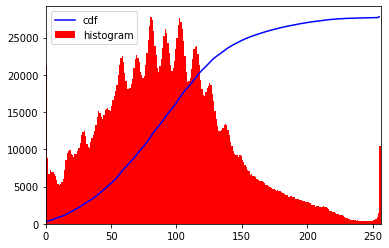

In [3]:
image_names = list(data_dir.glob('00008181.jpg'))

image_name = image_names[0]
filename = image_name.stem

img = cv2.imread(image_name, 0)

hist, bins = np.histogram(img.flatten(), 256, [0, 256])

cdf = hist.cumsum()
cdf_normalized = cdf * hist.max() / cdf.max()

plt.plot(cdf_normalized, color='b')
plt.hist(img.flatten(), 256, [0, 256], color='r')
plt.xlim([0, 256])
plt.legend(('cdf', 'histogram'), loc='upper left')
plt.show()

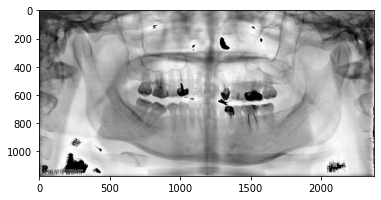

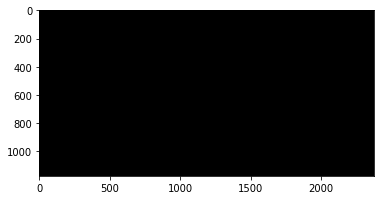

In [9]:
cdf_m = np.ma.masked_equal(cdf, 0)
cdf_m = (cdf_m - cdf_m.min()) * 255 / (cdf_m.max() - cdf_m.min())
cdf = np.ma.filled(cdf_m, 0).astype('uint8')

img2 = cdf[img]

plt.imshow(1 - img, cmap='gray')

plt.show()

plt.imshow(1 - img2, cmap='gray')
plt.show()

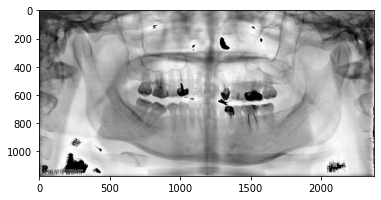

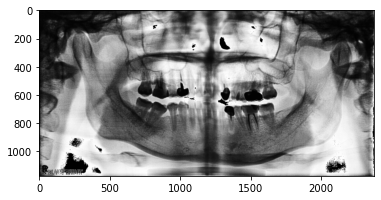

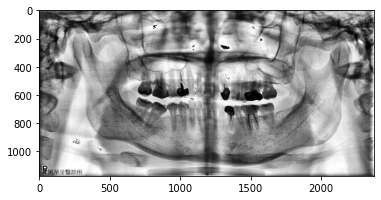

In [14]:
img = cv2.imread(image_name, 0)
equ = cv2.equalizeHist(img)
res = np.hstack((img, equ))  #stacking images side-by-side

clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
cl1 = clahe.apply(img)

plt.imshow(1 - img, cmap='gray')
plt.show()

plt.imshow(1 - equ, cmap='gray')
plt.show()

plt.imshow(1 - cl1, cmap='gray')
plt.show()


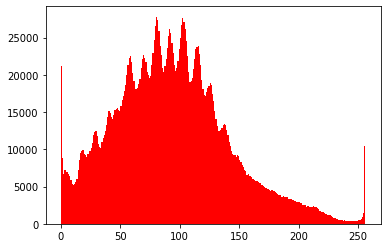

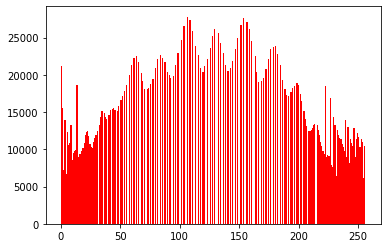

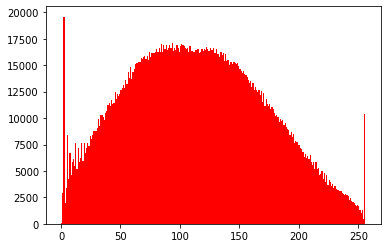

In [25]:
plt.hist(img.flatten(), 256, [0, 256], color='r')
plt.show()

plt.hist(equ.flatten(), 256, [0, 256], color='r')
plt.show()

plt.hist(cl1.flatten(), 256, [0, 256], color='r')
plt.show()


Gaussian filtering

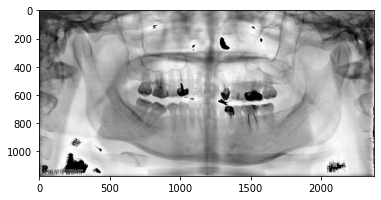

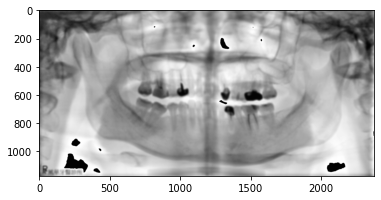

In [19]:
plt.gray()  # show the filtered result in grayscale

img = cv2.imread(image_name, 0)
result = gaussian_filter(img, sigma=5)

plt.imshow(1 - img)
plt.show()

plt.imshow(1 - result)
plt.show()

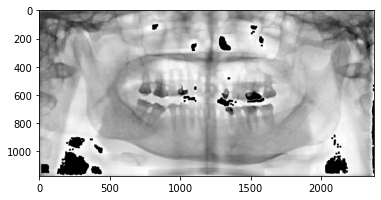

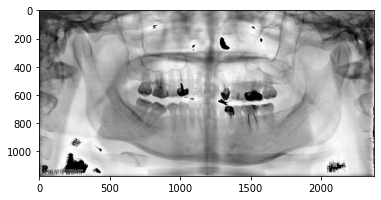

In [32]:

kernel = np.ones((5, 5), np.uint8)
erosion = cv2.erode(img, kernel, iterations=3)

blackhat = cv2.morphologyEx(img, cv2.MORPH_BLACKHAT, kernel)
tophat = cv2.morphologyEx(img, cv2.MORPH_TOPHAT, kernel)


plt.imshow(1 - erosion)
plt.show()

plt.imshow(1 - img)
plt.show()

